<a href="https://colab.research.google.com/github/vcngeno/Analytics_Programming/blob/main/HW6_Analytics_Programming_KNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Loading the Data from the source i.e. csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


In [11]:
#Loading the dataset
data = pd.read_csv('/content/titanic (1).csv')

In [12]:
#Checking the columns
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [13]:
# Determining the no. of records in our datasets
print(data.shape)

(901, 12)
(901, 12)


In [14]:
# Checking whether each column has an appropriate datatype
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  901 non-null    int64  
 1   Survived     901 non-null    int64  
 2   Pclass       901 non-null    int64  
 3   Name         901 non-null    object 
 4   Sex          901 non-null    object 
 5   Age          723 non-null    float64
 6   SibSp        901 non-null    int64  
 7   Parch        901 non-null    int64  
 8   Ticket       901 non-null    object 
 9   Fare         901 non-null    float64
 10  Cabin        205 non-null    object 
 11  Embarked     899 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 84.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  901 non-null    int64  
 1   Sur

<Axes: >

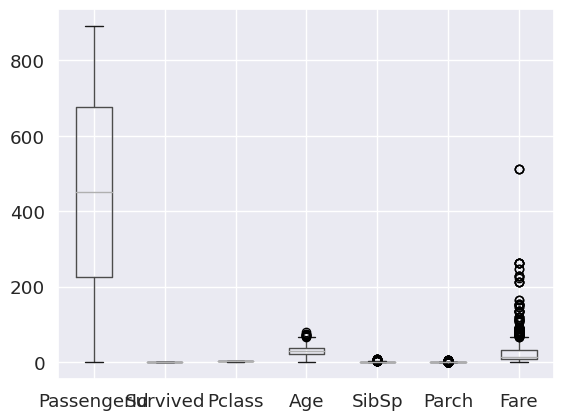

<Axes: >

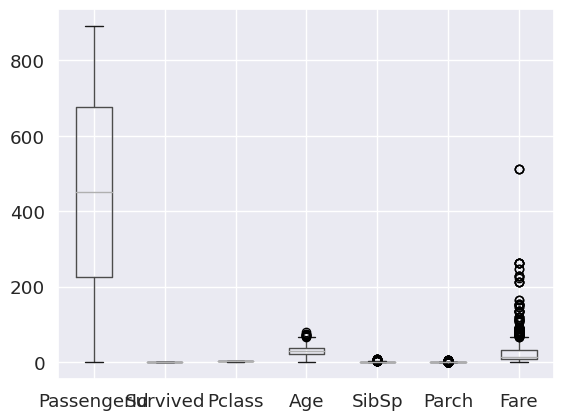

In [15]:
#Checking for outliers
data.boxplot()

I decided to keep the outliers as they were in the age, fare, Parch and SibSp columns and removing or changing their values would give false results during modelling

In [16]:

# Identifying the Missing Data
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,178
SibSp,0
Parch,0
Ticket,0
Fare,0


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,178
SibSp,0
Parch,0
Ticket,0
Fare,0


In [17]:
#Dropping the missing values in the datasets
data.dropna(inplace=True)

In [18]:
#Dropping columns
data.drop(['Name','Embarked', 'Fare','Ticket','Cabin'], axis = 1, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
1,2,1,1,female,38.0,1,0
3,4,1,1,female,35.0,1,0
6,7,0,1,male,54.0,0,0
10,11,1,3,female,4.0,1,1
11,12,1,1,female,58.0,0,0


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
1,2,1,1,female,38.0,1,0
3,4,1,1,female,35.0,1,0
6,7,0,1,male,54.0,0,0
10,11,1,3,female,4.0,1,1
11,12,1,1,female,58.0,0,0


In [19]:
#The summary statistics are as follows
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch
count   184.000000  184.000000  184.000000  184.000000  184.000000  184.000000
mean    457.630435    0.673913    1.190217   35.735978    0.467391    0.478261
std     248.283692    0.470059    0.513971   15.623390    0.643608    0.753546
min       2.000000    0.000000    1.000000    0.920000    0.000000    0.000000
25%     263.750000    0.000000    1.000000   24.000000    0.000000    0.000000
50%     459.000000    1.000000    1.000000   36.000000    0.000000    0.000000
75%     680.500000    1.000000    1.000000   47.250000    1.000000    1.000000
max     890.000000    1.000000    3.000000   80.000000    3.000000    4.000000


#Linear Discriminant Analysis

In [21]:
# Data Reduction
#WE'LL APPLY LDA HERE
#Preparing the data for encoding
#We'll drop some columns that are not necessary for the study then convert the remaining columns to numericals
train = data.copy(deep=True)
train['Sex'] = data['Sex'].astype('category')
train['Age'] = data['Age'].astype('category')
train['SibSp'] = data['SibSp'].astype('category')
train['PassengerId'] = data['PassengerId'].astype('category')
train['Parch'] = data['Parch'].astype('category')
train['Pclass'] = data['Pclass'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 1 to 892
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  184 non-null    category
 1   Survived     184 non-null    int64   
 2   Pclass       184 non-null    category
 3   Sex          184 non-null    category
 4   Age          184 non-null    category
 5   SibSp        184 non-null    category
 6   Parch        184 non-null    category
dtypes: category(6), int64(1)
memory usage: 12.9 KB


In [22]:
#Using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train = train.copy(deep=True)
train['Sex']=labelencoder.fit_transform(train['Sex'])
train['Sex']

,Sex
1,2
3,2
6,3
10,2
11,2
...,...
872,3
879,2
887,2
889,3


In [23]:
# #Rearranging the columns to have Survived as the first column
train = train[['Survived', 'Parch', 'Pclass', 'Sex', 'Age', 'SibSp', 'PassengerId']]
train

,Survived,Parch,Pclass,Sex,Age,SibSp,PassengerId
1,1,0,1,2,38.0,1,2
3,1,0,1,2,35.0,1,4
6,0,0,1,3,54.0,0,7
10,1,1,3,2,4.0,1,11
11,1,0,1,2,58.0,0,12
...,...,...,...,...,...,...,...
872,0,0,1,3,33.0,0,873
879,1,1,1,2,56.0,0,880
887,1,0,1,2,19.0,0,888
889,1,0,1,3,26.0,0,890


In [24]:
#Separating the target label (price) from the other features

feat = train.iloc[:,1:6]
label = train['Survived']

In [25]:
#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_

array([[-0.28987533, -0.69267291, -2.11695185, -0.04644132,  0.27602008]])

In [26]:
new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)

,0
SibSp,0.276020
Age,-0.046441
Parch,-0.289875
Pclass,-0.692673
Sex,-2.116952


LDA INTERPRETATION

The major features that determine survival of a passenger is Number of siblings or spouses on board, followed by age then number of Parents/Children.

Sex and Passenger class have minimal determination of passenger survival

#**Implementing the Solution**

##**Modelling**

##**KNN Classifier Model**

In [27]:
# Splitting our dataset into its attributes and labels
X = train.iloc[:,1:6].values
y = train['Survived'].values

In [28]:
# Train Test Split
# To avoid over-fitting, we will divide our dataset into training and test splits,
# which gives us a better idea as to how our algorithm performed during the testing phase.
# This way our algorithm is tested on un-seen data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [29]:
# Feature Scaling
# Before making any actual predictions, it is always a good practice to scale the features
# so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Training and Predictions
# In the second line, this class is initialized with one parameter, i.e. n_neigbours.
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation,
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [32]:
#Evaluating the Algorithm
# In evaluating an algorithm, confusion matrix, precision, F1 score are the commonly used metrics
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)

[[ 2  9]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        11
           1       0.69      0.77      0.73        26

    accuracy                           0.59        37
   macro avg       0.47      0.48      0.47        37
weighted avg       0.56      0.59      0.57        37

0.5945945945945946
0.6896551724137931 0.7692307692307693


In [33]:
# Train Test Split with 70/30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [34]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#Fitting the KNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [37]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)

[[ 9  6]
 [ 9 32]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        15
           1       0.84      0.78      0.81        41

    accuracy                           0.73        56
   macro avg       0.67      0.69      0.68        56
weighted avg       0.75      0.73      0.74        56

0.7321428571428571
0.8421052631578947 0.7804878048780488


In [38]:
# Train Test Split with 60/40
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [39]:
#Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#Fitting the KNN model
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
#We'll now make predictions on our test data
y_pred = classifier.predict(X_test)

In [42]:
#Evaluating the algorithm
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
precision, recall = precision_score(y_test, y_pred), recall_score(y_test, y_pred)
print(precision, recall)

[[14  9]
 [10 41]]
              precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.82      0.80      0.81        51

    accuracy                           0.74        74
   macro avg       0.70      0.71      0.70        74
weighted avg       0.75      0.74      0.74        74

0.7432432432432432
0.82 0.803921568627451


##**KNN CLASSIFIER MODEL INTERPRETATION**

From the above, we notice that our model gets better having increased the test size. Generally the model is a good fit with a F1 score of 0.49 and precision of 71%, accuracy of 71% using the largest test size of 40.

The confusion matrix also keeps getting better with 10 & 43 accurate values on the 3rd model